In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats

from scipy.stats import iqr     #iqr hesaplama

In [31]:
#[:,0:5]
data_body_x = np.loadtxt("body_acc_x_train.txt")
data_body_x = data_body_x
data_body_y = np.loadtxt("body_acc_y_train.txt")
data_body_y = data_body_y

data_body_z = np.loadtxt("body_acc_z_train.txt")
data_body_z = data_body_z

data_body_gyro_x = np.loadtxt("body_gyro_x_train.txt")
data_body_gyro_x = data_body_gyro_x

data_body_gyro_y  = np.loadtxt("body_gyro_y_train.txt")
data_body_gyro_y = data_body_gyro_y

data_body_gyro_z  = np.loadtxt("body_gyro_z_train.txt")
data_body_gyro_z = data_body_gyro_z

data_total_acc_x = np.loadtxt("total_acc_x_train.txt")
data_total_acc_x = data_total_acc_x

data_total_acc_y  = np.loadtxt("total_acc_y_train.txt")
data_total_acc_y = data_total_acc_y

data_total_acc_z  = np.loadtxt("total_acc_z_train.txt")
data_total_acc_z = data_total_acc_z

data_body_test_x = np.loadtxt("body_acc_x_test.txt")
data_body_test_x = data_body_test_x

data_body_test_y = np.loadtxt("body_acc_y_test.txt")
data_body_test_y = data_body_test_y

data_body_test_z = np.loadtxt("body_acc_z_test.txt")
data_body_test_z = data_body_test_z

data_body_gyro_test_x = np.loadtxt("body_gyro_x_test.txt")
data_body_gyro_test_x = data_body_gyro_test_x

data_body_gyro_test_y  = np.loadtxt("body_gyro_y_test.txt")
data_body_gyro_test_y = data_body_gyro_test_y

data_body_gyro_test_z  = np.loadtxt("body_gyro_z_test.txt")
data_body_gyro_test_z = data_body_gyro_test_z

data_total_acc_test_x = np.loadtxt("total_acc_x_test.txt")
data_total_acc_test_x = data_total_acc_test_x

data_total_acc_test_y  = np.loadtxt("total_acc_y_test.txt")
data_total_acc_test_y = data_total_acc_test_y

data_total_acc_test_z  = np.loadtxt("total_acc_z_test.txt")
data_total_acc_test_z = data_total_acc_test_z

In [33]:

def toplu(a):

  df = pd.DataFrame(a)

  
  max1 = df.apply(lambda x : x.max(),axis=1)
  min1 = df.apply(lambda x : x.min(),axis=1)
  mean1 = df.apply(lambda x : x.mean(),axis=1)
  std1 = df.apply(lambda x : x.std(),axis=1)
  mad1 = df.apply(lambda x : x.mad(),axis=1)
  iqr1 = df.apply(lambda x : x.quantile(0.25),axis=1)
  sma1 = df.apply(lambda x : x.rolling(100).mean(),axis=1)
  sma1 = sma1.iloc[:,99:100]


  result = np.column_stack((max1,min1,mean1,std1,mad1,iqr1))
  return result

dt=0.02 # dt=1/50=0.02s time duration between two rows

# Input: 1D array with lenght=N (N:unknown)
# Output: 1D array with lenght=N-1
def jerk_one_signal(signal): 
        return np.array([(signal[i+1]-signal[i])/dt for i in range(len(signal)-1)])

################################ Magnitude Function ######################################
import math 
def mag_3_signals(x,y,z):# magnitude function redefintion
    return np.array([math.sqrt((x[i]**2+y[i]**2+z[i]**2)) for i in range(len(x))])

In [32]:
y_train = np.loadtxt("y_train.txt")
y_test = np.loadtxt("y_test.txt")



#result_train = np.column_stack((toplu(data_body_x),toplu(data_body_y),toplu(data_body_z)))



result_train = np.column_stack((toplu(jerk_one_signal(data_body_x)),toplu(jerk_one_signal(data_body_y)),toplu(jerk_one_signal(data_body_z)),
                          toplu(jerk_one_signal(data_body_gyro_x)),toplu(jerk_one_signal(data_body_gyro_y)),toplu(jerk_one_signal(data_body_gyro_z)),
                          toplu(jerk_one_signal(data_total_acc_x)),toplu(jerk_one_signal(data_total_acc_y)),toplu(jerk_one_signal(data_total_acc_z)),
                          toplu(data_body_x[:-1]),toplu(data_body_y[:-1]),toplu(data_body_z[:-1]),toplu(data_body_gyro_x[:-1]),toplu(data_body_gyro_y[:-1]),toplu(data_body_gyro_z[:-1]),
                          toplu(data_total_acc_x[:-1]),toplu(data_total_acc_y[:-1]),toplu(data_total_acc_z[:-1])))

#result_test = np.column_stack((toplu(data_body_test_x),toplu(data_body_test_y),toplu(data_body_test_z)))



result_test = np.column_stack((toplu(jerk_one_signal(data_body_test_x)),toplu(jerk_one_signal(data_body_test_y)),toplu(jerk_one_signal(data_body_test_z)),
                          toplu(jerk_one_signal(data_body_gyro_test_x)),toplu(jerk_one_signal(data_body_gyro_test_y)),toplu(jerk_one_signal(data_body_gyro_test_z)),
                          toplu(jerk_one_signal(data_total_acc_test_x)),toplu(jerk_one_signal(data_total_acc_test_y)),toplu(jerk_one_signal(data_total_acc_test_z)),
                          toplu(data_body_test_x[:-1]),toplu(data_body_test_y[:-1]),toplu(data_body_test_z[:-1]),
                          toplu(data_body_gyro_test_x[:-1]),toplu(data_body_gyro_test_y[:-1]),toplu(data_body_gyro_test_z[:-1]),
                          toplu(data_total_acc_test_x[:-1]),toplu(data_total_acc_test_y[:-1]),toplu(data_total_acc_test_z[:-1])))

X_train = result_train
Y_train = y_train
X_test = result_test
Y_test = y_test

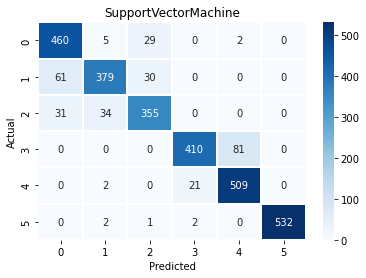

SVM

              precision    recall  f1-score   support

         1.0       0.83      0.93      0.88       496
         2.0       0.90      0.81      0.85       470
         3.0       0.86      0.85      0.85       420
         4.0       0.95      0.84      0.89       491
         5.0       0.86      0.96      0.91       532
         6.0       1.00      0.99      1.00       537

    accuracy                           0.90      2946
   macro avg       0.90      0.89      0.89      2946
weighted avg       0.90      0.90      0.90      2946



In [34]:
#SupportVectorMachine model eğitimi
#john smilga
from sklearn.svm import SVC
svc = SVC(kernel="linear")
yyyy = y_train
svc.fit(X_train,y_train[:-1])
y_pred = svc.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test[:-1], y_pred)

#plot confusion matrix
import seaborn as sns
sns.heatmap(cm,annot=True,fmt="",cmap='Blues',linewidths=0.30)
#sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SupportVectorMachine")
plt.show()

from sklearn import metrics
print("SVM\n")
print(metrics.classification_report(Y_test[:-1], y_pred))

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 128, 1280],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}#'linear','sigmoid','poly',
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train, y_train[:-1])

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import warnings

pipelineLR = make_pipeline(StandardScaler(), LogisticRegression(random_state=1, penalty='l2', solver='lbfgs'))
#
# Create the parameter grid
#
param_grid_lr = [{
    'logisticregression__C': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0],
}]
#
# Create an instance of GridSearch Cross-validation estimator
#
gsLR = GridSearchCV(estimator=pipelineLR,
                     param_grid = param_grid_lr,
                     scoring='accuracy',
                     cv=10,
                     refit=True,
                     n_jobs=1)
#
# Train the LogisticRegression Classifier
#
gsLR = gsLR.fit(X_train, Y_train[:-1])
#
# Print the training score of the best model
#
print(gsLR.best_score_)
#
# Print the model parameters of the best model
#
print(gsLR.best_params_)
#
# Print the test score of the best model
#
clfLR = gsLR.best_estimator_
print('Test accuracy: %.3f' % clfLR.score(X_test, Y_test[:-1]))

In [ ]:

from sklearn.ensemble import RandomForestClassifier
pipelineRFC = make_pipeline(StandardScaler(), RandomForestClassifier(criterion='gini', random_state=1))
#
# Create the parameter grid
#
param_grid_rfc = [{
    'randomforestclassifier__max_depth':[2, 3, 4],
    'randomforestclassifier__max_features':[2, 3, 4, 5, 6]
}]
#
# Create an instance of GridSearch Cross-validation estimator
#
gsRFC = GridSearchCV(estimator=pipelineRFC,
                     param_grid = param_grid_rfc,
                     scoring='accuracy',
                     cv=10,
                     refit=True,
                     n_jobs=1)
#
# Train the RandomForestClassifier
#
gsRFC = gsRFC.fit(X_train, Y_train)
#
# Print the training score of the best model
#
print(gsRFC.best_score_)
#
# Print the model parameters of the best model
#
print(gsRFC.best_params_)
#
# Print the test score of the best model
#
clfRFC = gsRFC.best_estimator_
print('Test accuracy: %.3f' % clfRFC.score(X_test, Y_test))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
estimator_KNN = KNeighborsClassifier(algorithm='auto')
parameters_KNN = {
    'n_neighbors': (1,10, 1),
    'leaf_size': (20,40,1),
    'p': (1,2),
    'weights': ('uniform', 'distance'),
    'metric': ('minkowski', 'chebyshev'),
}  
# with GridSearch
grid_search_KNN = GridSearchCV(
    estimator=estimator_KNN,
    param_grid=parameters_KNN,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = 5
)

KNN_1=grid_search_KNN.fit(X_train, Y_train)
y_pred_KNN1 =KNN_1.predict(X_test)


#Parameter setting that gave the best results on the hold out data.
print(grid_search_KNN.best_params_ ) 
#Mean cross-validated score of the best_estimator
print('Best Score - KNN:', grid_search_KNN.best_score_ )

c:\Users\okanu\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


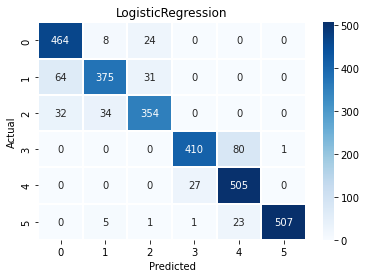

LogisticRegression

              precision    recall  f1-score   support

         1.0       0.83      0.94      0.88       496
         2.0       0.89      0.80      0.84       470
         3.0       0.86      0.84      0.85       420
         4.0       0.94      0.84      0.88       491
         5.0       0.83      0.95      0.89       532
         6.0       1.00      0.94      0.97       537

    accuracy                           0.89      2946
   macro avg       0.89      0.88      0.89      2946
weighted avg       0.89      0.89      0.89      2946



In [36]:
#Logistic Regression

# -*- coding: utf-8 -*-
"""
Created on Sat Jul  2 22:59:41 2022

@author: Okan
"""

#LogisticRegression model eğitimi
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(random_state=0,solver='lbfgs', max_iter=1280)
logr.fit(X_train,Y_train[:-1])
Y_pred = logr.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test[:-1], Y_pred)

#plot confusion matrix
import seaborn as sns
sns.heatmap(cm,annot=True,fmt="",cmap='Blues',linewidths=0.30)
#sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("LogisticRegression")
plt.show()

from sklearn import metrics
print("LogisticRegression\n")
print(metrics.classification_report(Y_test[:-1], Y_pred))

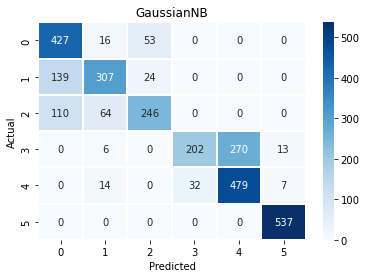

GaussianNB accuracy: 0.7460964019008826
              precision    recall  f1-score   support

         1.0       0.63      0.86      0.73       496
         2.0       0.75      0.65      0.70       470
         3.0       0.76      0.59      0.66       420
         4.0       0.86      0.41      0.56       491
         5.0       0.64      0.90      0.75       532
         6.0       0.96      1.00      0.98       537

    accuracy                           0.75      2946
   macro avg       0.77      0.74      0.73      2946
weighted avg       0.77      0.75      0.74      2946



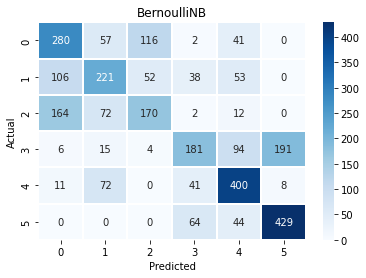

BernoullyNB accuracy :  0.5706042090970808
              precision    recall  f1-score   support

         1.0       0.49      0.56      0.53       496
         2.0       0.51      0.47      0.49       470
         3.0       0.50      0.40      0.45       420
         4.0       0.55      0.37      0.44       491
         5.0       0.62      0.75      0.68       532
         6.0       0.68      0.80      0.74       537

    accuracy                           0.57      2946
   macro avg       0.56      0.56      0.55      2946
weighted avg       0.56      0.57      0.56      2946



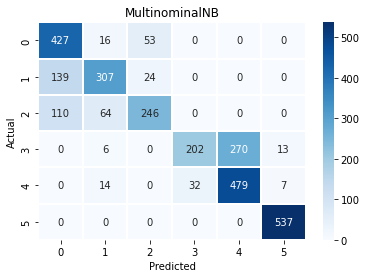

MultinominalNB accuracy :  0.6805838424983028
              precision    recall  f1-score   support

         1.0       0.46      0.60      0.52       496
         2.0       0.92      0.29      0.44       470
         3.0       0.50      0.73      0.59       420
         4.0       0.66      0.95      0.78       491
         5.0       0.88      0.54      0.67       532
         6.0       1.00      0.95      0.98       537

    accuracy                           0.68      2946
   macro avg       0.74      0.68      0.66      2946
weighted avg       0.75      0.68      0.67      2946



In [37]:
#MultinominalNB için girdiler 0-1 aralığına ölçeklenir
from sklearn import preprocessing
from sklearn import metrics
min_max_scaler = preprocessing.MinMaxScaler()
x_train_scaled = min_max_scaler.fit_transform(X_train)
x_test_scaled = min_max_scaler.fit_transform(X_test)

#GaussianNB model eğitimi
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train[:-1])
y_pred = gnb.predict(X_test)

#BernoulliNB
from sklearn.naive_bayes import BernoulliNB
BNBclf = BernoulliNB()
BNBclf.fit(X_train, Y_train[:-1])
y_predBNB = BNBclf.predict(X_test)

#MultinominalNB
from sklearn.naive_bayes import MultinomialNB
MNclf = MultinomialNB()
MNclf.fit(x_train_scaled, Y_train[:-1])
y_predMN = MNclf.predict(x_test_scaled)

#plot confusion matrix (GaussianNB)
from sklearn.metrics import confusion_matrix
cmGNB = confusion_matrix(Y_test[:-1], y_pred)
#plot confusion matrix (GaussianNB)
import seaborn as sns
sns.heatmap(cmGNB,annot=True,fmt="",cmap='Blues',linewidths=0.30)
#sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("GaussianNB")
plt.show()
dogruluk = metrics.accuracy_score(Y_test[:-1], y_pred)
print("GaussianNB accuracy:",dogruluk)
print(metrics.classification_report(Y_test[:-1], y_pred))

##plot confusion matrix (BernoulliNB)
from sklearn.metrics import confusion_matrix
cmBNB = confusion_matrix(Y_test[:-1], y_predBNB)
#plot confusion matrix
import seaborn as sns
sns.heatmap(cmBNB,annot=True,fmt="",cmap='Blues',linewidths=0.30)
#sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("BernoulliNB")
plt.show()
bnbaccuracy = metrics.accuracy_score(Y_test[:-1], y_predBNB)
print("BernoullyNB accuracy : ",bnbaccuracy)
print(metrics.classification_report(Y_test[:-1], y_predBNB))

##plot confusion matrix (MultinominalNB)
from sklearn.metrics import confusion_matrix
cmMN = confusion_matrix(Y_test[:-1], y_pred)
#plot confusion matrix
import seaborn as sns
#x_axis_labels = [Laying,Sitting,Standing,Walking,WalkDS,WalkUS]
sns.heatmap(cmMN,annot=True,fmt="",cmap='Blues',linewidths=0.30)
#sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("MultinominalNB")
plt.show()
MNaccuracy = metrics.accuracy_score(Y_test[:-1], y_predMN)
print("MultinominalNB accuracy : ",MNaccuracy)
print(metrics.classification_report(Y_test[:-1], y_predMN))

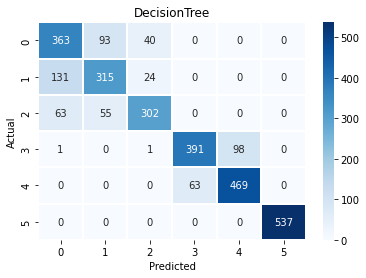

DecisionTree

              precision    recall  f1-score   support

         1.0       0.65      0.73      0.69       496
         2.0       0.68      0.67      0.68       470
         3.0       0.82      0.72      0.77       420
         4.0       0.86      0.80      0.83       491
         5.0       0.83      0.88      0.85       532
         6.0       1.00      1.00      1.00       537

    accuracy                           0.81      2946
   macro avg       0.81      0.80      0.80      2946
weighted avg       0.81      0.81      0.81      2946

Total accuracy: 0.806856754921928


In [39]:
#gridsearch ile parametre aranması
#görsellerştirme teknikleri kategorilere göre

#DecisionTree model eğitimi
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = "gini")
dtc.fit(X_train,Y_train[:-1])

y_pred = dtc.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test[:-1], y_pred)

#plot confusion matrix
import seaborn as sns
sns.heatmap(cm,annot=True,fmt="",cmap='Blues',linewidths=0.30)
#sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("DecisionTree")
plt.show()

from sklearn import metrics
print("DecisionTree\n")
print(metrics.classification_report(Y_test[:-1], y_pred))
dogruluk = metrics.accuracy_score(Y_test[:-1], y_pred)
print("Total accuracy:",dogruluk)

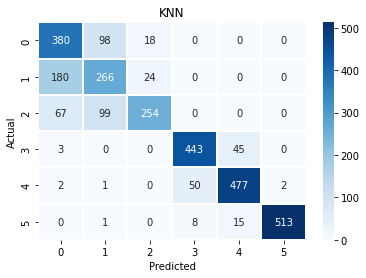

KNN

              precision    recall  f1-score   support

         1.0       0.60      0.77      0.67       496
         2.0       0.57      0.57      0.57       470
         3.0       0.86      0.60      0.71       420
         4.0       0.88      0.90      0.89       491
         5.0       0.89      0.90      0.89       532
         6.0       1.00      0.96      0.98       537

    accuracy                           0.79      2946
   macro avg       0.80      0.78      0.79      2946
weighted avg       0.80      0.79      0.79      2946

Total accuracy: 0.7919212491513917


0.7919212491513917

In [38]:
#KNN model eğitimi
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4, metric="manhattan")
knn.fit(X_train,Y_train[:-1])

y_pred = knn.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test[:-1], y_pred)

#plot confusion matrix
import seaborn as sns
sns.heatmap(cm,annot=True,fmt="",cmap='Blues',linewidths=0.30)
#sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("KNN")
plt.show()

from sklearn import metrics
print("KNN\n")
print(metrics.classification_report(Y_test[:-1], y_pred))
dogruluk = metrics.accuracy_score(Y_test[:-1], y_pred)
print("Total accuracy:",dogruluk)
knn.score(X_test,Y_test[:-1])

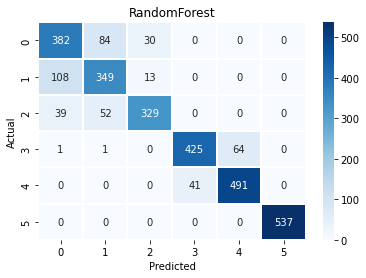

RandomForest

              precision    recall  f1-score   support

         1.0       0.72      0.77      0.74       496
         2.0       0.72      0.74      0.73       470
         3.0       0.88      0.78      0.83       420
         4.0       0.91      0.87      0.89       491
         5.0       0.88      0.92      0.90       532
         6.0       1.00      1.00      1.00       537

    accuracy                           0.85      2946
   macro avg       0.85      0.85      0.85      2946
weighted avg       0.86      0.85      0.85      2946

Accuracy: 0.8530210454854039


In [40]:
#RANDOM FOREST model eğitimi
from sklearn.ensemble import RandomForestClassifier
rfc =RandomForestClassifier(n_estimators=32,criterion="gini")
rfc.fit(X_train,Y_train[:-1])
y_pred = rfc.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test[:-1], y_pred)

#plot confusion matrix
import seaborn as sns
sns.heatmap(cm,annot=True,fmt="",cmap='Blues',linewidths=0.30)
#sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("RandomForest")
plt.show()

from sklearn import metrics
print("RandomForest\n")
print(metrics.classification_report(Y_test[:-1], y_pred))

dogruluk = metrics.accuracy_score(Y_test[:-1], y_pred)
print("Accuracy:",dogruluk)


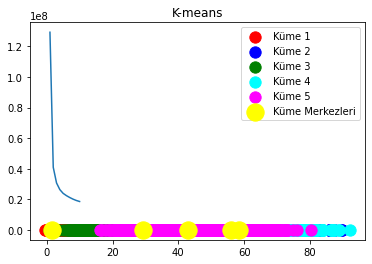

In [41]:
from sklearn.cluster import KMeans

wcss = []
kume_sayisi_listesi = range(1, 11)
for i in kume_sayisi_listesi :
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

plt.plot(kume_sayisi_listesi, wcss)
#plt.title('Küme Sayısı Belirlemek için Dirsek Yöntemi')
#plt.xlabel('Küme Sayısı')
#plt.ylabel('WCSS')
#plt.show()

kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X_train)

plt.scatter(X_train[y_kmeans == 0, 0], X_train[y_kmeans == 0, 1], s = 128, c = 'red', label = 'Küme 1')
plt.scatter(X_train[y_kmeans == 1, 0], X_train[y_kmeans == 1, 1], s = 128, c = 'blue', label = 'Küme 2')
plt.scatter(X_train[y_kmeans == 2, 0], X_train[y_kmeans == 2, 1], s = 128, c = 'green', label = 'Küme 3')
plt.scatter(X_train[y_kmeans == 3, 0], X_train[y_kmeans == 3, 1], s = 128, c = 'cyan', label = 'Küme 4')
plt.scatter(X_train[y_kmeans == 4, 0], X_train[y_kmeans == 4, 1], s = 128, c = 'magenta', label = 'Küme 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Küme Merkezleri')
plt.title('K-means')
plt.legend()
plt.show()


In [42]:

df = pd.DataFrame(data_body_x)
max2 = df.apply(lambda x : x.max(),axis=1)

sns.pairplot(df)

Error in callback <function flush_figures at 0x000001F988B84CA0> (for post_execute):


KeyboardInterrupt: 

In [ ]:
pd.DataFrame(Y_test).plot(kind="Density",  # Plot the distribution
                               figsize=(9,9),
                               xlim=(-1,11));

In [43]:
import seaborn as sb
df = pd.read_csv("train.csv")
facetgrid = sns.FacetGrid(df, "Activity", "tBodyAcc-mean()-X", hue='Activity', size=6,aspect=2)

g = sb.FacetGrid(df)
g.map(plt.histplot, "Activity", "tBodyAcc-mean()-X")
plt.show()

c:\Users\okanu\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: row, col. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\okanu\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


KeyboardInterrupt: 

ValueError: Image size of 6347808x2592 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 6.34781e+06x2592 with 2782 Axes>

In [ ]:
graph = sb.FacetGrid(df, col ="Activity",  hue ="tBodyAcc-mean()-X")
# map the above form facetgrid with some attributes
graph.map(plt.scatter, "Activity", "tBodyAcc-mean()-X", edgecolor ="w").add_legend()
# show the object
plt.show()

In [ ]:
import seaborn
import matplotlib.pyplot as plt
  
# loading of a dataframe from seaborn
  
############# Main Section         #############
# Form a facetgrid using columns with a hue
graph = seaborn.FacetGrid(df, hue ="Activity")
# map the above form facetgrid with some attributes
graph.map(plt.scatter, "Activity", "tBodyAcc-mean()-X" , edgecolor ="w").add_legend()
# show the object
plt.show()

In [ ]:
import seaborn
import matplotlib.pyplot as plt
  
# loading of a dataframe from seaborn
  
############# Main Section         #############
# Form a facetgrid using columns with a hue
graph = seaborn.FacetGrid(df,hue = "Activity")
# map the above form facetgrid with some attributes
graph.map(plt.hist, "Activity", bins = 6).add_legend()
# show the object
plt.show()

In [ ]:
import seaborn
import matplotlib.pyplot as plt
  
# loading of a dataframe from seaborn
  
############# Main Section         #############
# Form a facetgrid using columns with a hue
graph = seaborn.FacetGrid(df,hue ="Activity")
# map the above form facetgrid with some attributes
graph.map(seaborn.histplot,"Activity", "tBodyAcc-mean()-X")
#graph.map(seaborn.regplot, "Activity", "tBodyAcc-mean()-X").add_legend()
# show the object
plt.show()

In [ ]:
import seaborn
import matplotlib.pyplot as plt
  
# loading of a dataframe from seaborn
  
############# Main Section         #############
# Form a facetgrid using columns with a hue
graph = seaborn.FacetGrid(df, hue="Activity", size=6,aspect=2)
# map the above form facetgrid with some attributes
graph.map(seaborn.scatterplot, "tBodyAcc-mean()-X","Activity")
#graph.map(seaborn.regplot, "Activity", "tBodyAcc-mean()-X").add_legend()
# show the object
plt.show()

In [ ]:
import seaborn
import matplotlib.pyplot as plt
  
df = pd.read_csv("train.csv")
# loading of a dataframe from seaborn

############# Main Section         #############
# Form a facetgrid using columns with a hue
graph = seaborn.FacetGrid(df, hue= "Activity", size=6,aspect=2)
# map the above form facetgrid with some attributes
graph.map(seaborn.distplot,"tBodyGyroJerk-std()-Y", hist=False).add_legend()
#graph.map(seaborn.regplot, "Activity", "tBodyAcc-mean()-X").add_legend()
# show the object
plt.show()


In [45]:
from sklearn.manifold import TSNE
def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
        
    for index,perplexity in enumerate(perplexities):
        # perform t-sne
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
        print('Done..')
        
        # prepare the data for seaborn         
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})
        
        # draw the plot in appropriate place in the grid
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,\
                   palette="Set1",markers=['^','v','s','o', '1','2'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')


performing tsne with perplexity 2 and with 1000 iterations at max
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 7351 samples in 0.001s...


c:\Users\okanu\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\okanu\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 7351 samples in 1.435s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7351
[t-SNE] Computed conditional probabilities for sample 2000 / 7351
[t-SNE] Computed conditional probabilities for sample 3000 / 7351
[t-SNE] Computed conditional probabilities for sample 4000 / 7351
[t-SNE] Computed conditional probabilities for sample 5000 / 7351
[t-SNE] Computed conditional probabilities for sample 6000 / 7351
[t-SNE] Computed conditional probabilities for sample 7000 / 7351
[t-SNE] Computed conditional probabilities for sample 7351 / 7351
[t-SNE] Mean sigma: 0.497458
[t-SNE] Computed conditional probabilities in 0.027s
[t-SNE] Iteration 50: error = 124.3357544, gradient norm = 0.0180972 (50 iterations in 2.068s)
[t-SNE] Iteration 100: error = 107.1229172, gradient norm = 0.0275678 (50 iterations in 1.691s)
[t-SNE] Iteration 150: error = 101.1122131, gradient norm = 0.0191664 (50 iterations in 1.593s)
[t-SNE] Iteration 200: error = 97.8186264, gra

c:\Users\okanu\Anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


saving this plot as image in present working directory...


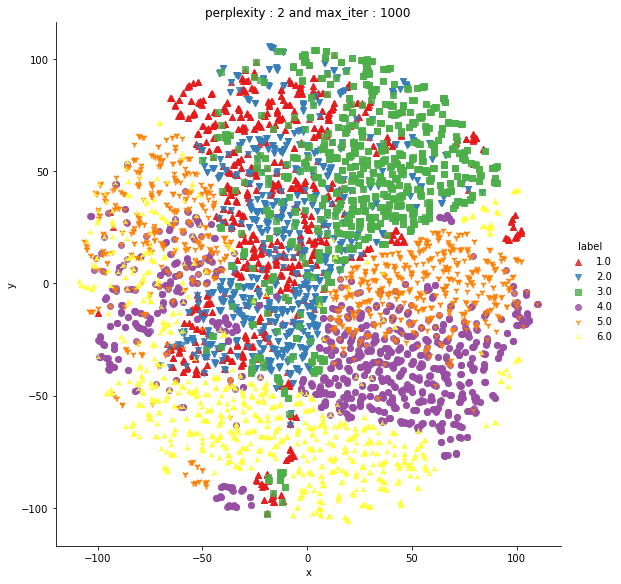

Done

performing tsne with perplexity 5 and with 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7351 samples in 0.001s...


c:\Users\okanu\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\okanu\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 7351 samples in 1.365s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7351
[t-SNE] Computed conditional probabilities for sample 2000 / 7351
[t-SNE] Computed conditional probabilities for sample 3000 / 7351
[t-SNE] Computed conditional probabilities for sample 4000 / 7351
[t-SNE] Computed conditional probabilities for sample 5000 / 7351
[t-SNE] Computed conditional probabilities for sample 6000 / 7351
[t-SNE] Computed conditional probabilities for sample 7000 / 7351
[t-SNE] Computed conditional probabilities for sample 7351 / 7351
[t-SNE] Mean sigma: 0.825574
[t-SNE] Computed conditional probabilities in 0.054s
[t-SNE] Iteration 50: error = 113.7670670, gradient norm = 0.0129955 (50 iterations in 2.350s)
[t-SNE] Iteration 100: error = 98.7818146, gradient norm = 0.0127499 (50 iterations in 2.420s)
[t-SNE] Iteration 150: error = 95.1717453, gradient norm = 0.0072641 (50 iterations in 2.001s)
[t-SNE] Iteration 200: error = 93.3306732, gradi

c:\Users\okanu\Anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


saving this plot as image in present working directory...


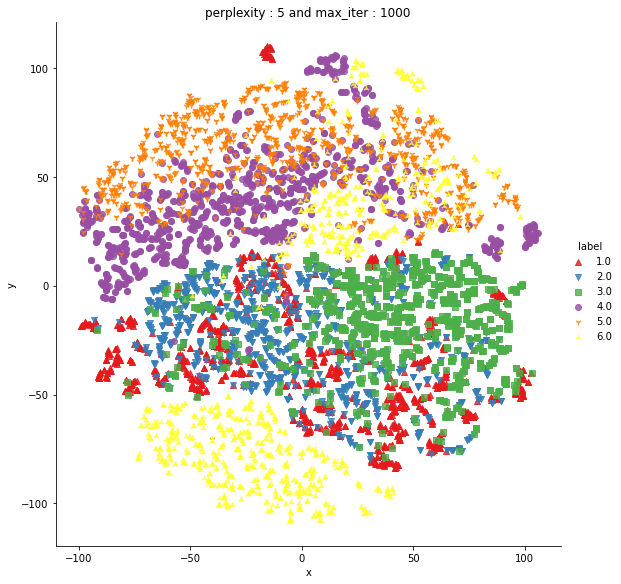

Done

performing tsne with perplexity 10 and with 1000 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7351 samples in 0.001s...


c:\Users\okanu\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\okanu\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 7351 samples in 1.323s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7351
[t-SNE] Computed conditional probabilities for sample 2000 / 7351
[t-SNE] Computed conditional probabilities for sample 3000 / 7351
[t-SNE] Computed conditional probabilities for sample 4000 / 7351
[t-SNE] Computed conditional probabilities for sample 5000 / 7351
[t-SNE] Computed conditional probabilities for sample 6000 / 7351
[t-SNE] Computed conditional probabilities for sample 7000 / 7351
[t-SNE] Computed conditional probabilities for sample 7351 / 7351
[t-SNE] Mean sigma: 1.004644
[t-SNE] Computed conditional probabilities in 0.100s
[t-SNE] Iteration 50: error = 105.4109192, gradient norm = 0.0163048 (50 iterations in 2.141s)
[t-SNE] Iteration 100: error = 89.3222656, gradient norm = 0.0075315 (50 iterations in 2.241s)
[t-SNE] Iteration 150: error = 87.0582123, gradient norm = 0.0035829 (50 iterations in 1.858s)
[t-SNE] Iteration 200: error = 86.3402405, gradi

c:\Users\okanu\Anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


saving this plot as image in present working directory...


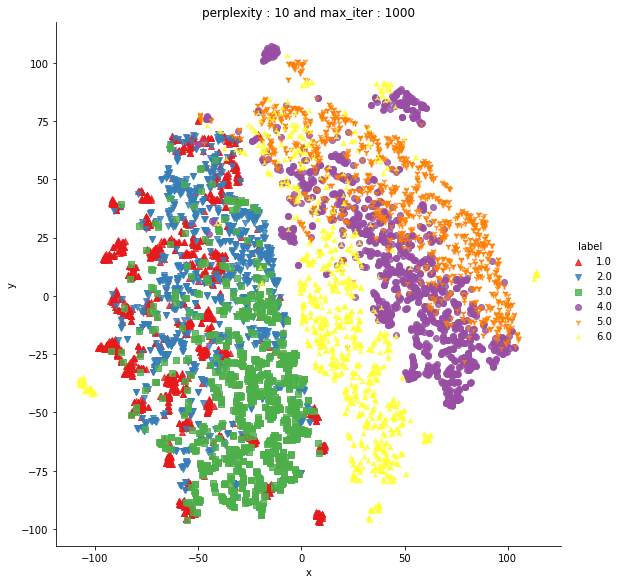

Done

performing tsne with perplexity 20 and with 1000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7351 samples in 0.001s...


c:\Users\okanu\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\okanu\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 7351 samples in 1.362s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7351
[t-SNE] Computed conditional probabilities for sample 2000 / 7351
[t-SNE] Computed conditional probabilities for sample 3000 / 7351
[t-SNE] Computed conditional probabilities for sample 4000 / 7351
[t-SNE] Computed conditional probabilities for sample 5000 / 7351
[t-SNE] Computed conditional probabilities for sample 6000 / 7351
[t-SNE] Computed conditional probabilities for sample 7000 / 7351
[t-SNE] Computed conditional probabilities for sample 7351 / 7351
[t-SNE] Mean sigma: 1.171170
[t-SNE] Computed conditional probabilities in 0.200s
[t-SNE] Iteration 50: error = 94.9959106, gradient norm = 0.0337937 (50 iterations in 2.323s)
[t-SNE] Iteration 100: error = 83.0362701, gradient norm = 0.0056071 (50 iterations in 2.501s)
[t-SNE] Iteration 150: error = 81.2847900, gradient norm = 0.0029574 (50 iterations in 2.245s)
[t-SNE] Iteration 200: error = 80.6956558, gradie

c:\Users\okanu\Anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


saving this plot as image in present working directory...


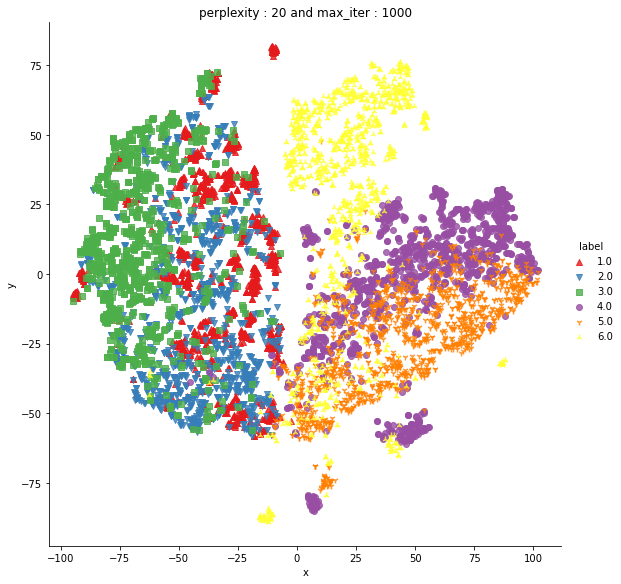

Done

performing tsne with perplexity 50 and with 1000 iterations at max
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7351 samples in 0.001s...


c:\Users\okanu\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\okanu\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 7351 samples in 1.552s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7351
[t-SNE] Computed conditional probabilities for sample 2000 / 7351
[t-SNE] Computed conditional probabilities for sample 3000 / 7351
[t-SNE] Computed conditional probabilities for sample 4000 / 7351
[t-SNE] Computed conditional probabilities for sample 5000 / 7351
[t-SNE] Computed conditional probabilities for sample 6000 / 7351
[t-SNE] Computed conditional probabilities for sample 7000 / 7351
[t-SNE] Computed conditional probabilities for sample 7351 / 7351
[t-SNE] Mean sigma: 1.412861
[t-SNE] Computed conditional probabilities in 0.570s
[t-SNE] Iteration 50: error = 86.6027679, gradient norm = 0.0105507 (50 iterations in 3.010s)
[t-SNE] Iteration 100: error = 74.6855392, gradient norm = 0.0036311 (50 iterations in 3.089s)
[t-SNE] Iteration 150: error = 73.6188049, gradient norm = 0.0019313 (50 iterations in 2.656s)
[t-SNE] Iteration 200: error = 73.2327652, gradie

c:\Users\okanu\Anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


saving this plot as image in present working directory...


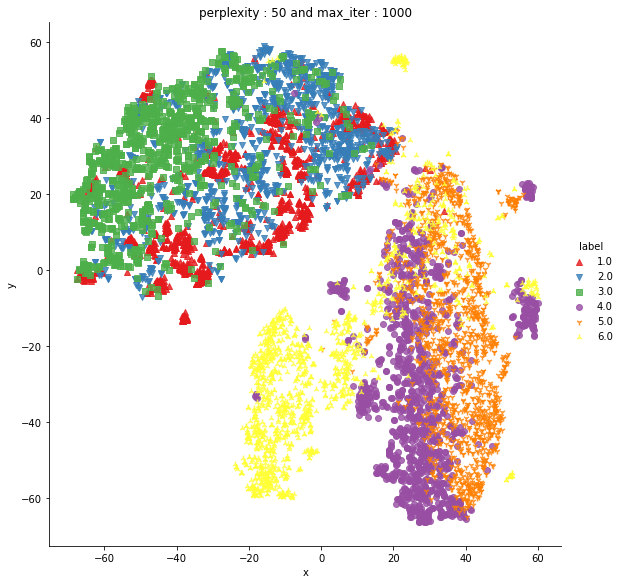

Done

performing tsne with perplexity 100 and with 1000 iterations at max
[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 7351 samples in 0.001s...


c:\Users\okanu\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\okanu\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 7351 samples in 1.556s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7351
[t-SNE] Computed conditional probabilities for sample 2000 / 7351
[t-SNE] Computed conditional probabilities for sample 3000 / 7351
[t-SNE] Computed conditional probabilities for sample 4000 / 7351
[t-SNE] Computed conditional probabilities for sample 5000 / 7351
[t-SNE] Computed conditional probabilities for sample 6000 / 7351
[t-SNE] Computed conditional probabilities for sample 7000 / 7351
[t-SNE] Computed conditional probabilities for sample 7351 / 7351
[t-SNE] Mean sigma: 1.656409
[t-SNE] Computed conditional probabilities in 1.115s
[t-SNE] Iteration 50: error = 74.3474884, gradient norm = 0.0316195 (50 iterations in 4.671s)
[t-SNE] Iteration 100: error = 67.9867783, gradient norm = 0.0025540 (50 iterations in 4.848s)
[t-SNE] Iteration 150: error = 67.1757584, gradient norm = 0.0007870 (50 iterations in 4.774s)
[t-SNE] Iteration 200: error = 66.9521103, gradie

c:\Users\okanu\Anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


saving this plot as image in present working directory...


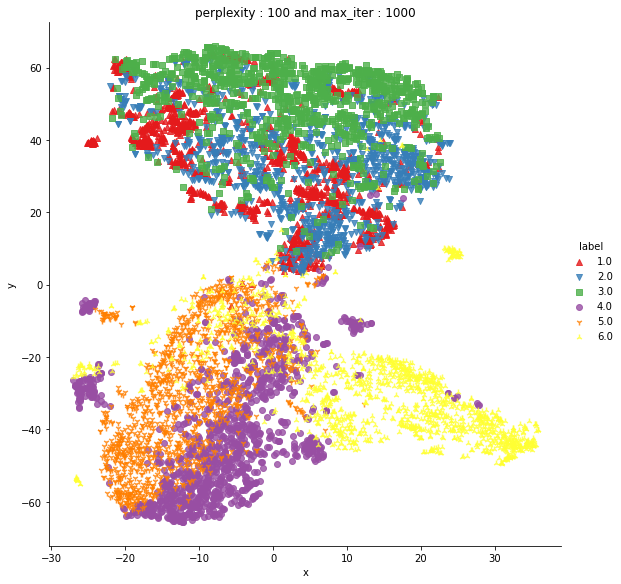

Done


In [46]:
#X_pre_tsne = train.drop(['subject', 'Activity','ActivityName'], axis=1)
#y_pre_tsne = train['ActivityName']
perform_tsne(X_data = X_train,y_data=Y_train[:-1], perplexities =[2,5,10,20,50,100])

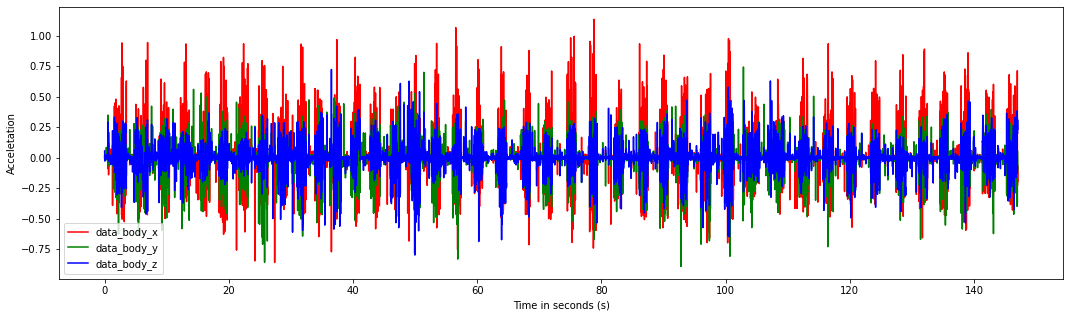

In [50]:
len_df=len(data_body_x)
    
# converting row numbers into time duration (the duration between two rows is 1/50=0.02 second)
time=[1/float(50) *j for j in range(len_df)]
    
# Define the figure and setting dimensions width and height
plt.figure(figsize=(18,5))
    
# ploting each signal component
plt.plot(time,data_body_x[:,0:1],color='red',label='data_body_x') 
plt.plot(time,data_body_y[:,0:1],color='green',label='data_body_y')
plt.plot(time,data_body_z[:,0:1],color='blue',label='data_body_z')
    
    
plt.ylabel("Acceletation")
plt.xlabel('Time in seconds (s)')
    
    
plt.legend(loc="lower left")
    
plt.show()


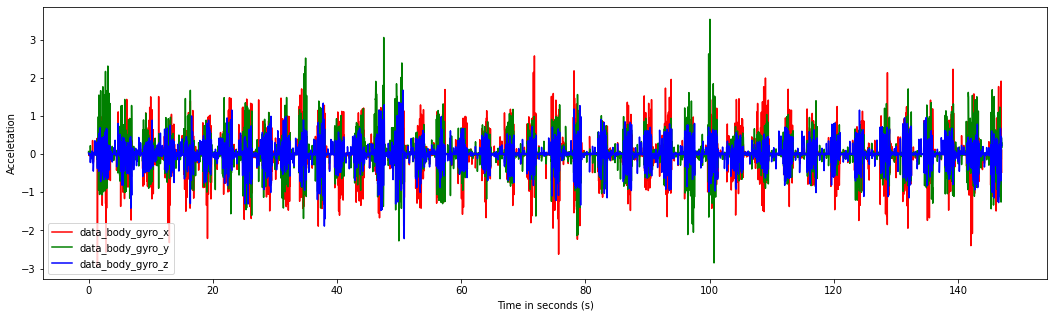

In [49]:
len_df=len(data_body_gyro_x)
    
# converting row numbers into time duration (the duration between two rows is 1/50=0.02 second)
time=[1/float(50) *j for j in range(len_df)]
    
# Define the figure and setting dimensions width and height
plt.figure(figsize=(18,5))
    
# ploting each signal component
plt.plot(time,data_body_gyro_x[:,0:1],color='red',label='data_body_gyro_x') 
plt.plot(time,data_body_gyro_y[:,0:1],color='green',label='data_body_gyro_y')
plt.plot(time,data_body_gyro_z[:,0:1],color='blue',label='data_body_gyro_z')
    
    
plt.ylabel("Acceletation")
plt.xlabel('Time in seconds (s)')
    
    
plt.legend(loc="lower left")
    
plt.show()

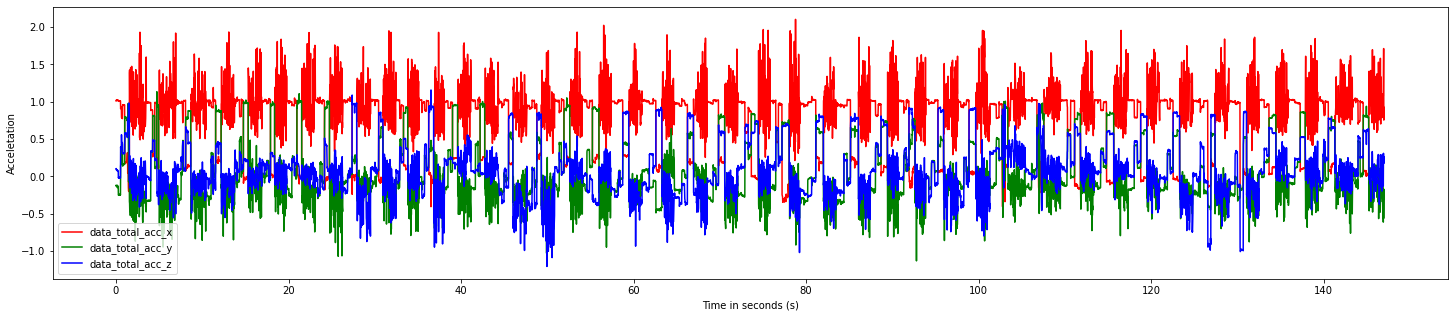

In [48]:
len_df=len(data_total_acc_x)
    
# converting row numbers into time (the duration between two rows is 1/50=0.02 second)
time=[1/float(50) *j for j in range(len_df)]
    
# Define the figure and setting dimensions width and height
plt.figure(figsize=(25,5))
    
# ploting each signal component
plt.plot(time,data_total_acc_x[:,0:1],color='red',label='data_total_acc_x')
plt.plot(time,data_total_acc_y[:,0:1],color='green',label='data_total_acc_y')
plt.plot(time,data_total_acc_z[:,0:1],color='blue',label='data_total_acc_z')
    
    
plt.ylabel("Acceletation")
plt.xlabel('Time in seconds (s)')
    
    
plt.legend(loc="lower left")
    
plt.show()